In [1]:
from data import train
from sklearn.svm import SVR
import numpy as np
from multiprocessing import cpu_count
from utils import StandardizedGridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

In [2]:
X=train.drop('sales', axis=1)
y=train.sales

## Decision Tree Regressor default

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state =20)

In [40]:
#Default Case
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)


DecisionTreeRegressor()

In [42]:
# Test MSE value for boosting (default)
np.mean((y_test - GB.predict(X_test))**2)

422.0834499151773

## Decision Tree Regressor Grid Search Model 2 

In [54]:
# DT Run2
DT = DecisionTreeRegressor()
DT.fit(X,y)

paramr = {  
            'max_depth' : [9]
              , 'max_features' : (None,'auto')
              , 'ccp_alpha' :np.linspace(0.01, 0.1, 20)
              , 'min_samples_split' : (4,6)
             }

DT_Grid = StandardizedGridSearchCV(DT,paramr,n_jobs=1)
DT_Grid.fit(X,y)

None, min_samples_split=4 
[CV]  ccp_alpha=0.09526315789473684, max_depth=9, max_features=None, min_samples_split=4, neg_mean_squared_error=(train=-601.022, test=-4321.410), r2=(train=0.943, test=0.398), total=   0.0s
[CV] ccp_alpha=0.09526315789473684, max_depth=9, max_features=None, min_samples_split=4 
[CV]  ccp_alpha=0.09526315789473684, max_depth=9, max_features=None, min_samples_split=4, neg_mean_squared_error=(train=-577.930, test=-1706.257), r2=(train=0.946, test=0.677), total=   0.0s
[CV] ccp_alpha=0.09526315789473684, max_depth=9, max_features=None, min_samples_split=4 
[CV]  ccp_alpha=0.09526315789473684, max_depth=9, max_features=None, min_samples_split=4, neg_mean_squared_error=(train=-495.772, test=-3372.805), r2=(train=0.948, test=0.795), total=   0.0s
[CV] ccp_alpha=0.09526315789473684, max_depth=9, max_features=None, min_samples_split=4 
[CV]  ccp_alpha=0.09526315789473684, max_depth=9, max_features=None, min_samples_split=4, neg_mean_squared_error=(train=-590.629, tes

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'ccp_alpha': array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ]),
                         'max_depth': [9], 'max_features': (None, 'auto'),
                         'min_samples_split': (4, 6)},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=10)

In [55]:
DT_Grid.save('models/DT2.p')

In [56]:
# Top 10 results for model DT2
DT_Grid.results.head(10)

,,,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,split5_test_neg_mean_squared_error,...,split2_train_r2,split3_train_r2,split4_train_r2,split5_train_r2,split6_train_r2,split7_train_r2,split8_train_r2,split9_train_r2,mean_train_r2,std_train_r2
ccp_alpha,max_depth,max_features,min_samples_split,,,,,,,,,,,,,,,,,,,,,
0.095263,9,auto,4,0.024533,0.001100,0.003295,0.001012,-1632.685951,-1941.067200,-4713.838185,-1303.535837,-2538.609710,-1706.257310,...,0.971578,0.941948,0.943104,0.946356,0.947920,0.943089,0.974900,0.946991,0.950553,0.011612
0.062105,9,NaN,4,0.024734,0.001773,0.002987,0.000782,-1401.122251,-1699.808601,-4939.669540,-1601.733226,-2686.075868,-1578.481374,...,0.971613,0.942008,0.943135,0.946386,0.947953,0.943102,0.974917,0.947050,0.950589,0.011608
0.071579,9,NaN,4,0.021043,0.001308,0.002299,0.000464,-1376.882439,-1714.800499,-4778.802651,-1856.229125,-2840.678889,-1706.631291,...,0.971595,0.941989,0.943135,0.946379,0.947946,0.943096,0.974909,0.947038,0.950578,0.011607
0.043158,9,NaN,4,0.020838,0.001579,0.002502,0.000498,-1294.492161,-1828.496511,-4902.223793,-1516.547555,-2079.927816,-1778.326102,...,0.971622,0.942029,0.943167,0.946412,0.947990,0.943107,0.974964,0.947061,0.950610,0.011612
0.095263,9,auto,6,0.025034,0.002195,0.003287,0.000790,-1325.459911,-1794.902554,-4716.987566,-1499.177117,-3019.475621,-1597.769021,...,0.964700,0.934656,0.929114,0.939612,0.941458,0.938794,0.968603,0.943223,0.943894,0.012030
0.066842,9,auto,6,0.020850,0.001294,0.002297,0.000463,-1329.550396,-1799.180437,-4885.127772,-1484.075666,-2815.542979,-1655.717005,...,0.964700,0.934704,0.929146,0.939635,0.941485,0.938801,0.968612,0.943262,0.943917,0.012021
0.090526,9,auto,6,0.027041,0.001903,0.002890,0.000697,-1327.877809,-1812.733214,-4716.987566,-1486.290424,-3035.564752,-1559.101797,...,0.964700,0.934674,0.929114,0.939621,0.941468,0.938794,0.968603,0.943223,0.943897,0.012028
0.010000,9,auto,6,0.021132,0.002032,0.002901,0.000311,-1326.216360,-1808.369749,-4782.389447,-1498.524886,-2975.698575,-1655.499784,...,0.964743,0.934748,0.929190,0.939655,0.941542,0.938828,0.968681,0.943297,0.943961,0.012026
0.066842,9,NaN,4,0.021230,0.001419,0.002398,0.000659,-1357.078550,-1875.301472,-4787.158458,-1542.517300,-2684.254220,-1706.631291,...,0.971595,0.941996,0.943135,0.946386,0.947946,0.943096,0.974909,0.947038,0.950579,0.011606


In [57]:
DT_Grid.results['mean_test_neg_mean_squared_error'].head(10)

ccp_alpha  max_depth  max_features  min_samples_split
0.095263   9          auto          4                   -2928.737629
0.062105   9          NaN           4                   -2944.705073
0.071579   9          NaN           4                   -2977.647594
0.043158   9          NaN           4                   -2980.986303
0.095263   9          auto          6                   -2991.367124
0.066842   9          auto          6                   -2991.967106
0.090526   9          auto          6                   -2992.914946
0.010000   9          auto          6                   -2996.789787
0.066842   9          NaN           4                   -2999.027430
0.033684   9          auto          6                   -3000.834978
Name: mean_test_neg_mean_squared_error, dtype: float64

## Decision Tree Regressor Grid Search Model 1 (Best Model)

In [45]:
DT = DecisionTreeRegressor()
DT.fit(X,y)

paramr = {  
              'max_leaf_nodes' : (np.logspace(-1, 0, 3) * train.shape[0]).astype(int)
              , 'max_depth' : (9,12)
              , 'max_features' : (None,'auto')
              , 'ccp_alpha' : (0.01,0.1,1)
              , 'min_samples_split' : (2,4,6)
             }

DT_Grid = StandardizedGridSearchCV(DT,paramr,n_jobs=1)
DT_Grid.fit(X,y)


x_leaf_nodes=199, min_samples_split=6, neg_mean_squared_error=(train=-542.343, test=-1375.160), r2=(train=0.948, test=0.847), total=   0.1s
[CV] ccp_alpha=1, max_depth=12, max_features=auto, max_leaf_nodes=199, min_samples_split=6 
[CV]  ccp_alpha=1, max_depth=12, max_features=auto, max_leaf_nodes=199, min_samples_split=6, neg_mean_squared_error=(train=-534.887, test=-1842.880), r2=(train=0.949, test=0.768), total=   0.1s
[CV] ccp_alpha=1, max_depth=12, max_features=auto, max_leaf_nodes=199, min_samples_split=6 
[CV]  ccp_alpha=1, max_depth=12, max_features=auto, max_leaf_nodes=199, min_samples_split=6, neg_mean_squared_error=(train=-290.334, test=-4862.625), r2=(train=0.973, test=0.163), total=   0.1s
[CV] ccp_alpha=1, max_depth=12, max_features=auto, max_leaf_nodes=199, min_samples_split=6 
[CV]  ccp_alpha=1, max_depth=12, max_features=auto, max_leaf_nodes=199, min_samples_split=6, neg_mean_squared_error=(train=-593.441, test=-1647.628), r2=(train=0.943, test=0.810), total=   0.1s
[C

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'ccp_alpha': (0.01, 0.1, 1), 'max_depth': (9, 12),
                         'max_features': (None, 'auto'),
                         'max_leaf_nodes': array([ 199,  629, 1992]),
                         'min_samples_split': (2, 4, 6)},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=10)

In [46]:
DT_Grid.save('models/DT1.p')

In [47]:
# Top 10 results for model DT1
DT_Grid.results.head(10)

auto         1992           4                         0.003052   
0.10      9         auto         199            2                         0.002943   
                                 629            4                         0.003528   

                                                                   std_score_time  \
ccp_alpha max_depth max_features max_leaf_nodes min_samples_split                   
0.01      9         auto         199            2                        0.001460   
                                 629            2                        0.002255   
                                                4                        0.005329   
1.00      12        auto         1992           2                        0.003114   
          9         auto         1992           4                        0.003392   
                    NaN          1992           4                        0.004536   
0.01      12        auto         629            4                        0.003541   
          9         auto         1992           4                        0.001492   
0.10      9         auto         199            2                        0.001673   
                                 629            4                        0.003065   

                                                                   split0_test_neg_mean_squared_error  \
ccp_alpha max_depth max_features max_leaf_nodes min_samples_split                                       
0.01      9         auto         199            2                                        -1325.775809   
                                 629            2                                        -1404.310178   
                                                4                                        -1222.140055   
1.00      12        auto         1992           2                                        -1953.219419   
          9         auto         1992           4                                        -1360.113779   
                    NaN          1992           4                                        -1356.719092   
0.01      12        auto         629            4                                        -1278.863311   
          9         auto         1992           4                                        -1235.374623   
0.10      9         auto         199            2                                        -1654.746816   
                                 629            4                                        -1395.044285   

                                                                   split1_test_neg_mean_squared_error  \
ccp_alpha max_depth max_features max_leaf_nodes min_samples_split                                       
0.01      9         auto         199            2                                        -1931.729197   
                                 629            2                                        -1654.479197   
                                                4                                        -1877.503919   
1.00      12        auto         1992           2                                        -1807.163690   
          9         auto         1992           4                                        -1882.268747   
                    NaN          1992           4                                        -1921.699684   
0.01      12        auto         629            4                                        -2114.693353   
          9         auto         1992           4                                        -1838.541419   
0.10      9         auto         199            2                                        -1986.369144   
                                 629            4                                        -1885.298172   

                                                                   split2_test_neg_mean_squared_error  \
ccp_alpha max_depth max_features max_leaf_nodes min_samples_split                                       
0.01    

In [48]:
DT_Grid.results['mean_test_neg_mean_squared_error'].head(10)

ccp_alpha  max_depth  max_features  max_leaf_nodes  min_samples_split
0.01       9          auto          199             2                   -2875.157479
                                    629             2                   -2877.963026
                                                    4                   -2901.733712
1.00       12         auto          1992            2                   -2910.683916
           9          auto          1992            4                   -2913.025647
                      NaN           1992            4                   -2913.996785
0.01       12         auto          629             4                   -2921.219217
           9          auto          1992            4                   -2950.312994
0.10       9          auto          199             2                   -2956.852905
                                    629             4                   -2968.607560
Name: mean_test_neg_mean_squared_error, dtype: float64

In [49]:
(-DT_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_leaf_nodes').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_leaf_nodes,,
199,379.647435,3276.184532
629,371.666809,3275.611145
1992,371.666972,3269.282636


In [50]:
(-DT_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_depth').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_depth,,
9,437.138621,3210.974447
12,311.515522,3336.411095


In [51]:
(-DT_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('ccp_alpha').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
ccp_alpha,,
0.01,360.260817,3272.226911
0.10,362.370019,3233.586938
1.00,400.350380,3315.264464


In [52]:
(-DT_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('min_samples_split').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
min_samples_split,,
2,145.017541,3366.857222
4,452.383680,3220.172386
6,525.579995,3234.048705


## Boosting Default

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state =20)

In [10]:
#To check default case
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)
# mse = MSE(X,GB.predict(y_test))


GradientBoostingRegressor()

In [11]:
# MSE value for boosting (default)
np.mean((y_test - GB.predict(X_test))**2)

2463.918953315882

## Gradient Boosting Best Model (Boosting 10)

In [33]:
#Boosting
#Decision Tree Regressor
#Run 10
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X,y)

paramr = {  'n_estimators': [50]
            #   , 'max_leaf_nodes' : (np.logspace(-1, 0, 3) * train.shape[0]).astype(int)
              , 'max_depth' : [10]
              , 'max_features' : (None,'auto')
              , 'ccp_alpha' : (0.01,0.1,1)
            #   , 'min_samples_split' : (2,4,6)
              , 'learning_rate' : np.linspace(0.005, 0.1, 50)
             
             }

GB_Grid = StandardizedGridSearchCV(GB,paramr ,n_jobs=1)
GB_Grid.fit(X,y)

=   1.4s
[CV] ccp_alpha=1, learning_rate=0.09418367346938776, max_depth=10, max_features=auto, n_estimators=50 
[CV]  ccp_alpha=1, learning_rate=0.09418367346938776, max_depth=10, max_features=auto, n_estimators=50, neg_mean_squared_error=(train=-87.389, test=-1541.650), r2=(train=0.992, test=0.822), total=   1.3s
[CV] ccp_alpha=1, learning_rate=0.09418367346938776, max_depth=10, max_features=auto, n_estimators=50 
[CV]  ccp_alpha=1, learning_rate=0.09418367346938776, max_depth=10, max_features=auto, n_estimators=50, neg_mean_squared_error=(train=-92.251, test=-1739.854), r2=(train=0.991, test=0.758), total=   1.2s
[CV] ccp_alpha=1, learning_rate=0.09418367346938776, max_depth=10, max_features=auto, n_estimators=50 
[CV]  ccp_alpha=1, learning_rate=0.09418367346938776, max_depth=10, max_features=auto, n_estimators=50, neg_mean_squared_error=(train=-86.893, test=-995.127), r2=(train=0.992, test=0.811), total=   1.3s
[CV] ccp_alpha=1, learning_rate=0.09418367346938776, max_depth=10, max_

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'ccp_alpha': (0.01, 0.1, 1),
                         'learning_rate': array([0.005     , 0.00693878, 0.00887755, 0.01081633, 0.0127551 ,
       0.01469388, 0.01663265, 0.01857143, 0.0205102 , 0.02244898,
       0.02438776, 0.02632653, 0.02826531, 0.03020408, 0.03214286,
       0.03408163, 0.03602041, 0.03795918, 0.03989796, 0.04183673,
       0.04377551,...
       0.06316327, 0.06510204, 0.06704082, 0.06897959, 0.07091837,
       0.07285714, 0.07479592, 0.07673469, 0.07867347, 0.08061224,
       0.08255102, 0.0844898 , 0.08642857, 0.08836735, 0.09030612,
       0.0922449 , 0.09418367, 0.09612245, 0.09806122, 0.1       ]),
                         'max_depth': [10], 'max_features': (None, 'auto'),
                         'n_estimators': [50]},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=10)

In [34]:
GB_Grid.save('models/Boosting10.p')

In [35]:
# Top 10 results for model 10, random forest with boosting
GB_Grid.results.head(10)

50                0.051624   
          0.082551      10        NaN          50                0.108088   
          0.076735      10        auto         50                0.049977   
          0.070918      10        auto         50                0.030873   
          0.100000      10        auto         50                0.085106   
          0.074796      10        NaN          50                0.030507   
          0.076735      10        NaN          50                0.032781   
          0.067041      10        NaN          50                0.021151   

                                                             mean_score_time  \
ccp_alpha learning_rate max_depth max_features n_estimators                    
1.0       0.090306      10        NaN          50                   0.003598   
          0.074796      10        auto         50                   0.003997   
          0.092245      10        NaN          50                   0.003981   
          0.082551      10        NaN          50                   0.004089   
          0.076735      10        auto         50                   0.003383   
          0.070918      10        auto         50                   0.003791   
          0.100000      10        auto         50                   0.003485   
          0.074796      10        NaN          50                   0.003590   
          0.076735      10        NaN          50                   0.003387   
          0.067041      10        NaN          50                   0.003887   

                                                             std_score_time  \
ccp_alpha learning_rate max_depth max_features n_estimators                   
1.0       0.090306      10        NaN          50                  0.000497   
          0.074796      10        auto         50                  0.001610   
          0.092245      10        NaN          50                  0.000770   
          0.082551      10        NaN          50                  0.001041   
          0.076735      10        auto         50                  0.000487   
          0.070918      10        auto         50                  0.000884   
          0.100000      10        auto         50                  0.000492   
          0.074796      10        NaN          50                  0.000489   
          0.076735      10        NaN          50                  0.000500   
          0.067041      10        NaN          50                  0.001369   

                                                             split0_test_neg_mean_squared_error  \
ccp_alpha learning_rate max_depth max_features n_estimators                                       
1.0       0.090306      10        NaN          50                                  -1024.567493   
          0.074796      10        auto         50                                  -1039.739352   
          0.092245      10        NaN          50                                   -947.318615   
          0.082551      10        NaN          50                                   -985.932004   
          0.076735      10        auto         50                                   -992.457689   
          0.070918      10        auto         50                                  -1019.706984   
          0.100000      10        auto         50                                   -987.019454   
          0.074796      10        NaN          50                                  -1040.652505   
          0.076735      10        NaN          50                                  -1032.308355   
          0.067041      10        NaN          50                                  -1105.897619   

                                                             split1_test_neg_mean_squared_error  \
ccp_alpha learning_rate max_depth max_features n_estimators                                       
1.0       0.090306      10        NaN          50                                  -1534.213518   
          0.074796      10        

In [36]:
GB_Grid.results['mean_test_neg_mean_squared_error'].head(10)

ccp_alpha  learning_rate  max_depth  max_features  n_estimators
1.0        0.090306       10         NaN           50             -2380.512852
           0.074796       10         auto          50             -2383.715041
           0.092245       10         NaN           50             -2396.952036
           0.082551       10         NaN           50             -2404.009310
           0.076735       10         auto          50             -2406.116954
           0.070918       10         auto          50             -2412.790000
           0.100000       10         auto          50             -2414.845873
           0.074796       10         NaN           50             -2416.821154
           0.076735       10         NaN           50             -2418.580002
           0.067041       10         NaN           50             -2421.494067
Name: mean_test_neg_mean_squared_error, dtype: float64

In [37]:
(-GB_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('learning_rate').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
learning_rate,,
0.005000,6245.084471,7151.036568
0.006939,5158.738890,6327.019005
0.008878,4262.207166,5655.692982
0.010816,3521.953060,5106.066789
0.012755,2910.816984,4651.925187
0.014694,2406.650864,4264.431830
0.016633,1990.475700,3957.643138
0.018571,1647.953723,3706.441594
0.020510,1364.923040,3498.996030


In [25]:
#Boosting
#Decision Tree Regressor
#Run 9
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X,y)

paramr = {  'n_estimators': [50]
            #   , 'max_leaf_nodes' : (np.logspace(-1, 0, 3) * train.shape[0]).astype(int)
              , 'max_depth' : [10]
              , 'max_features' : (None,'auto')
              , 'ccp_alpha' : (0.01,0.1,1)
            #   , 'min_samples_split' : (2,4,6)
              , 'learning_rate' : (0.05,0.1,1) 
             
             }

GB_Grid = StandardizedGridSearchCV(GB,paramr ,n_jobs=1)
GB_Grid.fit(X,y)

0, max_features=None, n_estimators=50, neg_mean_squared_error=(train=-17.292, test=-1715.568), r2=(train=0.998, test=0.806), total=   1.1s
[CV] ccp_alpha=0.1, learning_rate=1, max_depth=10, max_features=None, n_estimators=50 
[CV]  ccp_alpha=0.1, learning_rate=1, max_depth=10, max_features=None, n_estimators=50, neg_mean_squared_error=(train=-19.104, test=-9370.335), r2=(train=0.998, test=0.602), total=   1.1s
[CV] ccp_alpha=0.1, learning_rate=1, max_depth=10, max_features=None, n_estimators=50 
[CV]  ccp_alpha=0.1, learning_rate=1, max_depth=10, max_features=None, n_estimators=50, neg_mean_squared_error=(train=-18.552, test=-861.859), r2=(train=0.998, test=0.907), total=   1.1s
[CV] ccp_alpha=0.1, learning_rate=1, max_depth=10, max_features=auto, n_estimators=50 
[CV]  ccp_alpha=0.1, learning_rate=1, max_depth=10, max_features=auto, n_estimators=50, neg_mean_squared_error=(train=-20.972, test=-1959.814), r2=(train=0.998, test=0.782), total=   1.1s
[CV] ccp_alpha=0.1, learning_rate=1, 

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'ccp_alpha': (0.01, 0.1, 1),
                         'learning_rate': (0.05, 0.1, 1), 'max_depth': [10],
                         'max_features': (None, 'auto'), 'n_estimators': [50]},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=10)

In [26]:
GB_Grid.save('models/Boosting9.p')

In [27]:
# Top 10 results for model 9, random forest with boosting
GB_Grid.results.head(10)

50                0.035107   
          0.05          10        NaN          50                0.044803   
0.10      0.10          10        auto         50                0.110265   
                                  NaN          50                0.137082   
1.00      0.05          10        auto         50                0.046751   
0.01      0.10          10        auto         50                0.037861   
          0.05          10        auto         50                0.019256   
                                  NaN          50                0.041416   

                                                             mean_score_time  \
ccp_alpha learning_rate max_depth max_features n_estimators                    
1.00      0.10          10        NaN          50                   0.002802   
0.01      0.10          10        NaN          50                   0.003296   
1.00      0.10          10        auto         50                   0.003398   
          0.05          10        NaN          50                   0.003095   
0.10      0.10          10        auto         50                   0.003584   
                                  NaN          50                   0.003697   
1.00      0.05          10        auto         50                   0.003192   
0.01      0.10          10        auto         50                   0.004184   
          0.05          10        auto         50                   0.003289   
                                  NaN          50                   0.003290   

                                                             std_score_time  \
ccp_alpha learning_rate max_depth max_features n_estimators                   
1.00      0.10          10        NaN          50                  0.000404   
0.01      0.10          10        NaN          50                  0.000645   
1.00      0.10          10        auto         50                  0.001025   
          0.05          10        NaN          50                  0.000298   
0.10      0.10          10        auto         50                  0.000660   
                                  NaN          50                  0.000638   
1.00      0.05          10        auto         50                  0.000399   
0.01      0.10          10        auto         50                  0.001324   
          0.05          10        auto         50                  0.000459   
                                  NaN          50                  0.000456   

                                                             split0_test_neg_mean_squared_error  \
ccp_alpha learning_rate max_depth max_features n_estimators                                       
1.00      0.10          10        NaN          50                                  -1007.148977   
0.01      0.10          10        NaN          50                                  -1075.712130   
1.00      0.10          10        auto         50                                  -1016.489230   
          0.05          10        NaN          50                                  -1147.126324   
0.10      0.10          10        auto         50                                  -1034.271474   
                                  NaN          50                                  -1118.607157   
1.00      0.05          10        auto         50                                  -1164.832490   
0.01      0.10          10        auto         50                                  -1098.211643   
          0.05          10        auto         50                                  -1300.842633   
                                  NaN          50                                  -1317.580421   

                                                             split1_test_neg_mean_squared_error  \
ccp_alpha learning_rate max_depth max_features n_estimators                                       
1.00      0.10          10        NaN          50                                  -1488.989788   
0.01      0.10          10        

In [28]:
GB_Grid.results['mean_test_neg_mean_squared_error'].head(10)

ccp_alpha  learning_rate  max_depth  max_features  n_estimators
1.00       0.10           10         NaN           50             -2414.730690
0.01       0.10           10         NaN           50             -2476.764123
1.00       0.10           10         auto          50             -2500.674680
           0.05           10         NaN           50             -2519.584491
0.10       0.10           10         auto          50             -2521.825112
                                     NaN           50             -2535.384604
1.00       0.05           10         auto          50             -2552.715643
0.01       0.10           10         auto          50             -2556.335300
           0.05           10         auto          50             -2575.678639
                                     NaN           50             -2577.167875
Name: mean_test_neg_mean_squared_error, dtype: float64

In [32]:
(-GB_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('learning_rate').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
learning_rate,,
0.05,108.105028,2573.163968
0.10,36.145153,2500.952418
1.00,44.441383,3022.182704


In [15]:
#Boosting
#Decision Tree Regressor
#Run 8
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X,y)

paramr = {  'n_estimators': (10,50,100)
              , 'max_leaf_nodes' : (np.logspace(-1, 0, 3) * train.shape[0]).astype(int)
              , 'max_depth' : (9,10,12)
              , 'max_features' : (None,'auto')
              , 'ccp_alpha' : (0.01,0.1,1)
            #   , 'min_samples_split' : (2,4,6)
              , 'learning_rate' : (0.1,1,10) 
             
             }

GB_Grid = StandardizedGridSearchCV(GB,paramr ,n_jobs=1)
GB_Grid.fit(X,y)

es=auto, max_leaf_nodes=1992, n_estimators=10 
[CV]  ccp_alpha=1, learning_rate=10, max_depth=12, max_features=auto, max_leaf_nodes=1992, n_estimators=10, neg_mean_squared_error=(train=-129454738035386215301120.000, test=-67093308882205299179520.000), r2=(train=-12016016392135294976.000, test=-12714392379782354944.000), total=   0.5s
[CV] ccp_alpha=1, learning_rate=10, max_depth=12, max_features=auto, max_leaf_nodes=1992, n_estimators=10 
[CV]  ccp_alpha=1, learning_rate=10, max_depth=12, max_features=auto, max_leaf_nodes=1992, n_estimators=10, neg_mean_squared_error=(train=-114380007237656846008320.000, test=-166985476710072269668352.000), r2=(train=-12015477980442548224.000, test=-10133059119692978176.000), total=   0.4s
[CV] ccp_alpha=1, learning_rate=10, max_depth=12, max_features=auto, max_leaf_nodes=1992, n_estimators=10 
[CV]  ccp_alpha=1, learning_rate=10, max_depth=12, max_features=auto, max_leaf_nodes=1992, n_estimators=10, neg_mean_squared_error=(train=-124304207331485982654

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'ccp_alpha': (0.01, 0.1, 1),
                         'learning_rate': (0.1, 1, 10),
                         'max_depth': (9, 10, 12),
                         'max_features': (None, 'auto'),
                         'max_leaf_nodes': array([ 199,  629, 1992]),
                         'n_estimators': (10, 50, 100)},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=10)

In [16]:
GB_Grid.save('models/RF8p')

In [17]:
# Top 10 results for model 8, random forest with boosting
GB_Grid.results.head(10)

.00      0.1           9         auto         1992           100                                  -817.865430   
                                               629            50                                   -841.416323   
                                  NaN          1992           50                                   -847.800093   
                        10        NaN          1992           50                                   -974.011540   
                        9         NaN          1992           100                                  -823.963454   
0.01      0.1           9         auto         199            100                                  -889.765083   
1.00      0.1           10        NaN          629            100                                 -1050.069468   

                                                                            split1_test_neg_mean_squared_error  \
ccp_alpha learning_rate max_depth max_features max_leaf_nodes n_estimators                                       
1.00      0.1           10        auto         629            100                                 -1486.581925   
0.01      0.1           9         auto         1992           50                                  -1439.602730   
0.10      0.1           9         NaN          629            100                                 -1517.178430   
1.00      0.1           9         auto         1992           100                                 -1366.953485   
                                               629            50                                  -1425.157394   
                                  NaN          1992           50                                  -1381.625668   
                        10        NaN          1992           50                                  -1555.961210   
                        9         NaN          1992           100                                 -1348.633223   
0.01      0.1           9         auto         199            100                                 -1451.210246   
1.00      0.1           10        NaN          629            100                                 -1524.677255   

                                                                            split2_test_neg_mean_squared_error  \
ccp_alpha learning_rate max_depth max_features max_leaf_nodes n_estimators                                       
1.00      0.1           10        auto         629            100                                 -3067.876737   
0.01      0.1           9         auto         1992           50                                  -3483.792884   
0.10      0.1           9         NaN          629            100                                 -3183.653449   
1.00      0.1           9         auto         1992           100                                 -3492.649300   
                                               629            50                                  -3737.354397   
                                  NaN          1992           50                                  -3646.652253   
                        10        NaN          1992           50                                  -3466.361722   
                        9         NaN          1992           100                                 -3682.445848   
0.01      0.1           9         auto         199            100                                 -3874.887296   
1.00      0.1           10        NaN          629            100                                 -3607.626756   

                                                                            split3_test_neg_mean_squared_error  \
ccp_alpha learning_rate max_depth max_features max_leaf_nodes n_estimators                                       
1.00      0.1           10        auto         629            100                                 -1557.454104   
0.01      0.1           9         auto         1992           50                                  -1424.964936   
0.10    

In [18]:
GB_Grid.results['mean_test_neg_mean_squared_error'].head(10)

ccp_alpha  learning_rate  max_depth  max_features  max_leaf_nodes  n_estimators
1.00       0.1            10         auto          629             100            -2340.332437
0.01       0.1            9          auto          1992            50             -2393.844030
0.10       0.1            9          NaN           629             100            -2396.975151
1.00       0.1            9          auto          1992            100            -2397.654662
                                                   629             50             -2403.567618
                                     NaN           1992            50             -2405.427807
                          10         NaN           1992            50             -2408.513759
                          9          NaN           1992            100            -2411.010989
0.01       0.1            9          auto          199             100            -2411.185079
1.00       0.1            10         NaN           629           

In [19]:
(-GB_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('ccp_alpha').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
ccp_alpha,,
0.01,7.893825e+193,7.179233e+193
0.10,7.889447e+193,7.194375e+193
1.00,7.861519e+193,7.233503e+193


In [20]:
(-GB_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('n_estimators').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
n_estimators,,
10,4.074629e+22,3.571107e+22
50,8.901823e+98,8.091746e+98
100,2.364479e+194,2.160711e+194


In [21]:
(-GB_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_leaf_nodes').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_leaf_nodes,,
199,7.875471e+193,7.251366e+193
629,7.884748e+193,7.219569e+193
1992,7.884572e+193,7.136176e+193


In [22]:
(-GB_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_depth').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_depth,,
9,7.823403e+193,7.246723e+193
10,7.878368e+193,7.112573e+193
12,7.943020e+193,7.247815e+193


In [ ]:
(-GB_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_leaf_nodes').mean()

In [24]:
(-GB_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('learning_rate').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
learning_rate,,
0.1,4.661689e+02,2.829292e+03
1.0,4.519623e+01,3.121039e+03
10.0,2.364479e+194,2.160711e+194


In [31]:
GB_Grid.results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'split0_test_neg_mean_squared_error',
       'split1_test_neg_mean_squared_error',
       'split2_test_neg_mean_squared_error',
       'split3_test_neg_mean_squared_error',
       'split4_test_neg_mean_squared_error',
       'split5_test_neg_mean_squared_error',
       'split6_test_neg_mean_squared_error',
       'split7_test_neg_mean_squared_error',
       'split8_test_neg_mean_squared_error',
       'split9_test_neg_mean_squared_error',
       'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error',
       'rank_test_neg_mean_squared_error',
       'split0_train_neg_mean_squared_error',
       'split1_train_neg_mean_squared_error',
       'split2_train_neg_mean_squared_error',
       'split3_train_neg_mean_squared_error',
       'split4_train_neg_mean_squared_error',
       'split5_train_neg_mean_squared_error',
       'split6_train_neg_mean_squared_error',
       'split7_train_neg_mean_

## Random Forest without GridSearch

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state =20)


In [4]:
#Run7
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators= 1400, min_samples_split= 2
                            ,min_samples_leaf= 2
                            ,max_features="auto"
                            ,max_depth= 70
                            ,bootstrap=True)
RF.fit(X_train,y_train)


RandomForestRegressor(max_depth=70, min_samples_leaf=2, n_estimators=1400)

In [6]:
# score=RF.predict_proba(X_test)[:,1]
# MSE(y_test, score)
np.mean((y_test - RF.predict(X_test))**2)

2882.4038465507447

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(RF, X, y, cv=10)


array([0.91787975, 0.85102162, 0.82614696, 0.7940071 , 0.65665982,
       0.76636044, 0.75571501, 0.86401391, 0.52074583, 0.90612259])

## Random Forest and Bagging

In [45]:
#Random Forest and Bagging Model
#Run6
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X,y)

paramr = {'n_estimators' : [60]
              , 'criterion' : ['mse']
              , 'max_depth' : [9]
              , 'max_features' : ['auto']
              , 'ccp_alpha' : np.linspace(0.01, 1,100)
              , 'min_samples_split' : (2,40, 60, 100)
            , 'min_samples_leaf' : (2,40, 60, 100)
             }

RF_Grid = StandardizedGridSearchCV(RF,paramr)
RF_Grid.fit(X,y)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapse

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0...
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
                         'criterion': ['mse'], 'max_depth': [9],
                         'max_features': ['auto'],
                         'min_samples_leaf': (2, 40, 60, 100),
                         'min_samples_split': (2, 40, 60, 100),
                         'n_estimators': [60]},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=[

In [46]:
RF_Grid.save('models/RFp')

In [47]:
RF_Grid.results.head(10)

,,,,,,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,split5_test_neg_mean_squared_error,...,split2_train_r2,split3_train_r2,split4_train_r2,split5_train_r2,split6_train_r2,split7_train_r2,split8_train_r2,split9_train_r2,mean_train_r2,std_train_r2
ccp_alpha,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,,,,,,,,,,,,,,,,,,,,,
0.13,mse,9,auto,2,2,60,1.933917,0.084243,0.020244,0.007069,-699.811449,-1047.104154,-1072.899663,-1845.748034,-2212.277464,-1281.817138,...,0.925126,0.918585,0.916986,0.926345,0.921243,0.916215,0.948047,0.920715,0.923771,0.008827
0.21,mse,9,auto,2,2,60,2.035680,0.104973,0.018657,0.002118,-802.030477,-1284.029304,-767.041732,-1690.341500,-2472.698477,-1242.550150,...,0.917223,0.927135,0.923812,0.918401,0.909361,0.917695,0.949836,0.916829,0.921571,0.010451
0.30,mse,9,auto,2,2,60,2.177237,0.152360,0.017363,0.002735,-720.780690,-1137.296771,-957.484779,-1636.688873,-2429.047304,-1350.386488,...,0.924354,0.921491,0.919688,0.912088,0.912379,0.919727,0.949616,0.912589,0.919862,0.010806
0.79,mse,9,auto,2,2,60,2.450844,0.331975,0.019847,0.005248,-741.383840,-1344.411879,-755.724533,-1974.448549,-2261.195708,-1220.415909,...,0.916252,0.920497,0.923530,0.916989,0.923857,0.921109,0.945985,0.915656,0.922557,0.008268
0.44,mse,9,auto,2,2,60,2.283292,0.189854,0.018269,0.003681,-726.073254,-1078.186015,-742.348662,-1807.932034,-2616.677788,-1240.992549,...,0.913215,0.922922,0.917991,0.921268,0.916655,0.917372,0.947567,0.917847,0.920974,0.009530
0.83,mse,9,auto,2,2,60,2.582890,0.335619,0.018151,0.003019,-798.547708,-1252.350453,-843.929280,-1759.848726,-2184.437982,-1135.597045,...,0.915945,0.916918,0.923847,0.916410,0.909354,0.919447,0.944753,0.917937,0.919548,0.009126
0.26,mse,9,auto,2,2,60,2.010913,0.075250,0.020403,0.007270,-766.963844,-1239.891802,-932.048994,-1895.231328,-2259.295377,-1206.832091,...,0.920737,0.914979,0.917336,0.925135,0.917648,0.918296,0.951210,0.921696,0.921372,0.010716
0.10,mse,9,auto,2,2,60,1.980656,0.047003,0.017745,0.003240,-850.831249,-1291.114138,-1126.222168,-1808.874995,-2470.281603,-1144.032983,...,0.922060,0.929876,0.924529,0.923488,0.925154,0.917816,0.951608,0.914935,0.922904,0.011523
0.17,mse,9,auto,2,2,60,2.030688,0.083042,0.019334,0.003265,-795.817633,-1274.610706,-742.255122,-1805.852962,-2226.900740,-1246.377943,...,0.909124,0.922131,0.912797,0.924787,0.919142,0.917700,0.949794,0.921983,0.921462,0.010382


In [48]:
RF_Grid.results['mean_test_neg_mean_squared_error'].head(10)

ccp_alpha  criterion  max_depth  max_features  min_samples_leaf  min_samples_split  n_estimators
0.13       mse        9          auto          2                 2                  60             -2512.355050
0.21       mse        9          auto          2                 2                  60             -2521.959312
0.30       mse        9          auto          2                 2                  60             -2530.676260
0.79       mse        9          auto          2                 2                  60             -2531.888381
0.44       mse        9          auto          2                 2                  60             -2546.743823
0.83       mse        9          auto          2                 2                  60             -2550.811454
0.26       mse        9          auto          2                 2                  60             -2552.604655
0.10       mse        9          auto          2                 2                  60             -2553.527232
0.17   

In [49]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('min_samples_leaf').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
min_samples_leaf,,
2,1769.117739,3024.837898
40,3372.832321,3636.134574
60,3899.485088,4116.921408
100,4501.081754,4677.586518


In [50]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('min_samples_split').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
min_samples_split,,
2,3138.737381,3760.133360
40,3373.994261,3857.704514
60,3455.020080,3879.482219
100,3574.765179,3958.160303


In [51]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('ccp_alpha').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
ccp_alpha,,
0.01,3382.319253,3855.327410
0.02,3376.146677,3861.119200
0.03,3380.894811,3868.338895
0.04,3383.529984,3856.848848
0.05,3380.858865,3864.860434
...,...,...
0.96,3384.858648,3865.746840
0.97,3389.469108,3861.361760
0.98,3390.009372,3857.959353


In [54]:
standardGridSearch.load('models/RF5.p')

NameError: name 'standardGridSearch' is not defined

In [41]:
RF_Grid.results[['mean_train_neg_mean_squared_error','mean_test_neg_mean_squared_error']].head(10)

mean_train_neg_mean_squared_error  \
ccp_alpha criterion max_depth max_features n_estimators                                      
0.01      mse       9         NaN          50                                  -424.868948   
1.00      mse       9         auto         50                                  -440.253265   
                              NaN          50                                  -436.188630   
0.10      mse       9         NaN          40                                  -464.987935   
                              auto         40                                  -458.524783   
0.01      mse       9         auto         50                                  -407.610725   
10.00     mse       9         auto         40                                  -614.074728   
0.10      mse       9         auto         50                                  -465.682365   
0.01      mse       9         NaN          40                                  -454.755596   
10.00     mse       9         NaN          50                                  -634.130389   

                                                         mean_test_neg_mean_squared_error  
ccp_alpha criterion max_depth max_features n_estimators                                    
0.01      mse       9         NaN          50                                -2457.499775  
1.00      mse       9         auto         50                                -2461.900701  
                              NaN          50                                -2518.691935  
0.10      mse       9         NaN          40                                -2546.811331  
                              auto         40                                -2551.877625  
0.01      mse       9         auto         50                                -2552.689661  
10.00     mse       9         auto         40                                -2597.233101  
0.10      mse       9         auto         50                                -2600.579305  
0.01      mse       9         NaN          40                                -2614.516788  
10.00     mse       9         NaN          50                                -2620.753501

In [ ]:
#Random Forest and Bagging Model
#Run7
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X,y)

paramr = {'n_estimators' : [40]
              , 'criterion' : ['mse']
              , 'max_depth' : [9]
              , 'max_features' : (None,'auto')
              , 'ccp_alpha' : (0.01,0.1,1,10)
             }

RF_Grid = StandardizedGridSearchCV(RF,paramr)
RF_Grid.fit(X,y)

## Model to be used for Random Forest and Bagging (RF5)

In [5]:
#Random Forest and Bagging Model
#Run5
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X,y)

paramr = {'n_estimators' : (40,60)
              , 'criterion' : ('mse','mae')
              , 'max_depth' : (9,10)
              , 'max_features' : (None,'auto')
              , 'ccp_alpha' : (0.01,0.1,1,10)
             }

RF_Grid = StandardizedGridSearchCV(RF,paramr)
RF_Grid.fit(X,y)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'ccp_alpha': (0.01, 0.1, 1, 10),
                         'criterion': ('mse', 'mae'), 'max_depth': (9, 10),
                         'max_features': (None, 'auto'),
                         'n_estimators': (40, 60)},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=10)

In [6]:
RF_Grid.save('models/RF5.p')

In [34]:
RF_Grid.results['mean_test_neg_mean_squared_error'].head(10)

ccp_alpha  criterion  max_depth  max_features  n_estimators
0.01       mse        9          NaN           60             -2456.470671
                                 auto          40             -2456.994125
10.00      mse        9          auto          60             -2459.030346
0.01       mse        10         auto          40             -2463.521188
           mae        9          auto          40             -2464.090278
1.00       mse        10         auto          40             -2465.202530
                                               60             -2469.352987
                      9          auto          40             -2482.334826
0.01       mae        10         NaN           40             -2491.877461
0.10       mae        10         NaN           40             -2493.747916
Name: mean_test_neg_mean_squared_error, dtype: float64

In [32]:
RF_Grid.results.head(10)

mean_fit_time  \
ccp_alpha criterion max_depth max_features n_estimators                  
0.01      mse       9         NaN          60                 2.069081   
                              auto         40                 1.936296   
10.00     mse       9         auto         60                 1.936021   
0.01      mse       10        auto         40                 1.375366   
          mae       9         auto         40                30.685214   
1.00      mse       10        auto         40                 1.435061   
                                           60                 2.156431   
                    9         auto         40                 1.275887   
0.01      mae       10        NaN          40                30.124414   
0.10      mae       10        NaN          40                30.276009   

                                                         std_fit_time  \
ccp_alpha criterion max_depth max_features n_estimators                 
0.01      mse       9         NaN          60                1.080121   
                              auto         40                1.037633   
10.00     mse       9         auto         60                0.072075   
0.01      mse       10        auto         40                0.403159   
          mae       9         auto         40                0.913605   
1.00      mse       10        auto         40                0.065455   
                                           60                0.071278   
                    9         auto         40                0.029322   
0.01      mae       10        NaN          40                0.372973   
0.10      mae       10        NaN          40                0.559894   

                                                         mean_score_time  \
ccp_alpha criterion max_depth max_features n_estimators                    
0.01      mse       9         NaN          60                   0.052320   
                              auto         40                   0.040344   
10.00     mse       9         auto         60                   0.015259   
0.01      mse       10        auto         40                   0.015211   
          mae       9         auto         40                   0.014162   
1.00      mse       10        auto         40                   0.016755   
                                           60                   0.018151   
                    9         auto         40                   0.014063   
0.01      mae       10        NaN          40                   0.015359   
0.10      mae       10        NaN          40                   0.012566   

                                                         std_score_time  \
ccp_alpha criterion max_depth max_features n_estimators                   
0.01      mse       9         NaN          60                  0.084380   
                              auto         40                  0.059781   
10.00     mse       9         auto         60                  0.000898   
0.01      mse       10        auto         40                  0.005434   
          mae       9         auto         40                  0.002034   
1.00      mse       10        auto         40                  0.006257   
                                           60                  0.003051   
                    9         auto         40                  0.002766   
0.01      mae       10        NaN          40                  0.005467   
0.10      mae       10        NaN          40                  0.001017   

                                                         split0_test_neg_mean_squared_error  \
ccp_alpha criterion max_depth max_features n_estimators                                       
0.01      mse       9         NaN          60                                   -775.754650   
                              auto         40                                   -729.850411   
10.00     mse       9         auto         60                                   -691.939003   
0.

In [8]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('criterion').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
criterion,,
mae,2540.760085,3755.624665
mse,473.937943,2566.133387


In [9]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('ccp_alpha').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
ccp_alpha,,
0.01,451.087855,2563.079961
0.10,534.535947,2579.398503
1.00,1635.207732,3055.231703
10.00,3408.564523,4445.805938


In [10]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('n_estimators').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
n_estimators,,
40,1511.098740,3164.281418
60,1503.599289,3157.476634


In [12]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_depth').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_depth,,
9,1517.684894,3162.243610
10,1497.013135,3159.514442


In [15]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).mean()

mean_train_neg_mean_squared_error    1507.349014
mean_test_neg_mean_squared_error     3160.879026
dtype: float64

In [24]:
RF_Grid.best_estimator_

RandomForestRegressor(ccp_alpha=0.01, max_depth=9, max_features=None,
                      n_estimators=60)

In [28]:
RF = RandomForestRegressor(ccp_alpha=0.01, max_depth=9, max_features=None,n_estimators=60)
RF.fit(X,y)
y_pred = RF.predict(X,y)
MSE(y_pred,)

RandomForestRegressor(ccp_alpha=0.01, max_depth=9, max_features=None,
                      n_estimators=60)

In [5]:
#Random Forest and Bagging Model
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X,y)

paramr = {'n_estimators' : (10,50,100)
              , 'criterion' : ('mse','mae')
              , 'max_depth' : (3,5,7,9,10)
              , 'max_features' : (None,'auto','sqrt')
              , 'min_samples_split' : (2,4,6)
            , 'ccp_alpha' : (0.01,0.02,0.03,0.04,0.05,0.06,0.07)
             }
             #depth = 10,12,14

RF_Grid = StandardizedGridSearchCV(RF,paramr)
RF_Grid.fit(X,y)

Fitting 10 folds for each of 810 candidates, totalling 8100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ('mse', 'mae'),
                         'max_depth': (3, 5, 7, 9, 10),
                         'max_features': (None, 'auto', 'sqrt'),
                         'max_leaf_nodes': array([ 199,  629, 1992]),
                         'min_samples_split': (2, 4, 6),
                         'n_estimators': (10, 50, 100)},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=10)

In [6]:
RF_Grid.save('models/RF4.p')

In [2]:
RF_Grid.results.head()

NameError: name 'RF_Grid' is not defined

In [8]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('n_estimators').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
n_estimators,,
10,2005.301831,3579.602188
50,1882.135790,3409.646771
100,1867.722973,3394.632967


In [9]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('criterion').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
criterion,,
mae,2181.595304,3591.636340
mse,1655.178426,3330.951611


In [10]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_features').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_features,,
auto,1112.266171,2840.986387
sqrt,3533.065519,4708.840772


In [12]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_leaf_nodes').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_leaf_nodes,,
199,1920.027117,3462.387145
629,1917.004069,3455.198771
1992,1918.129409,3466.296010


min_samples_split
2    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
4    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
6    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

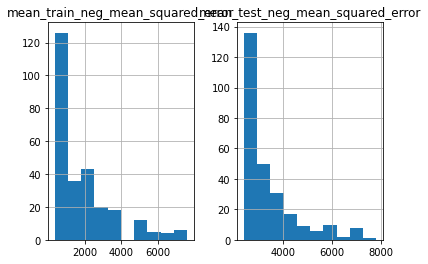

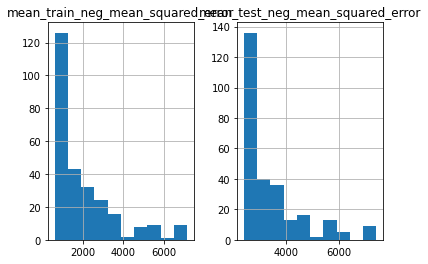

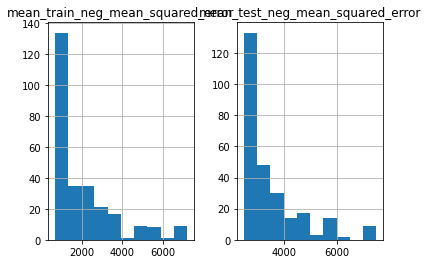

In [11]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('min_samples_split').hist()


criterion
mae    AxesSubplot(0.125,0.125;0.775x0.755)
mse    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean_test_neg_mean_squared_error, dtype: object

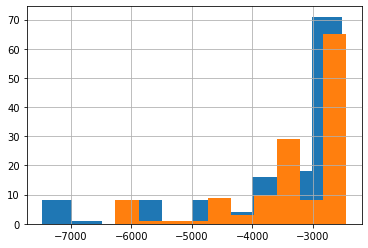

In [15]:
RF_Grid.results['mean_test_neg_mean_squared_error'].groupby('criterion').hist()

In [29]:
#Random Forest and Bagging Model
#RUN 2
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50)
RF.fit(X,y)
paramr = {  'criterion' : ('mse','mae')
              , 'max_leaf_nodes' : (np.logspace(-1, 0, 3) * train.shape[0]).astype(int)
              , 'max_depth' : (9,10,12)
              , 'max_features' : (None,'auto')
              , 'ccp_alpha' : (0.1,1,10)
             }

RF_Grid = StandardizedGridSearchCV(RF,paramr)
RF_Grid.fit(X,y)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=50), n_jobs=-1,
             param_grid={'ccp_alpha': (0.1, 1, 10), 'criterion': ('mse', 'mae'),
                         'max_depth': (9, 10, 12),
                         'max_features': (None, 'auto'),
                         'max_leaf_nodes': array([ 199,  629, 1992])},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=10)

In [30]:
RF_Grid.save('models/RFe50.p')

In [31]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_features').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_features,,
auto,1851.789347,3371.515468


In [33]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('criterion').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
criterion,,
mae,3221.085660,4154.229824
mse,481.424923,2590.768661


In [34]:
RF_Grid.results.head(10)

10        NaN          629                  2.269565   
                                           199                  2.210904   

                                                           std_fit_time  \
ccp_alpha criterion max_depth max_features max_leaf_nodes                 
1.0       mse       10        auto         199                 0.171242   
                              NaN          629                 0.091926   
                    9         auto         1992                0.091620   
                                           199                 0.082004   
                    12        NaN          199                 0.195587   
0.1       mae       10        auto         629                 0.750402   
          mse       9         auto         1992                0.137142   
1.0       mse       10        auto         629                 0.183072   
0.1       mse       10        NaN          629                 0.076147   
                                           199                 0.107924   

                                                           mean_score_time  \
ccp_alpha criterion max_depth max_features max_leaf_nodes                    
1.0       mse       10        auto         199                    0.015584   
                              NaN          629                    0.015485   
                    9         auto         1992                   0.017891   
                                           199                    0.016939   
                    12        NaN          199                    0.015372   
0.1       mae       10        auto         629                    0.013823   
          mse       9         auto         1992                   0.015513   
1.0       mse       10        auto         629                    0.014795   
0.1       mse       10        NaN          629                    0.019023   
                                           199                    0.015755   

                                                           std_score_time  \
ccp_alpha criterion max_depth max_features max_leaf_nodes                   
1.0       mse       10        auto         199                   0.001685   
                              NaN          629                   0.001876   
                    9         auto         1992                  0.009554   
                                           199                   0.002284   
                    12        NaN          199                   0.002282   
0.1       mae       10        auto         629                   0.001988   
          mse       9         auto         1992                  0.004097   
1.0       mse       10        auto         629                   0.001563   
0.1       mse       10        NaN          629                   0.005073   
                                           199                   0.002150   

                                                           split0_test_neg_mean_squared_error  \
ccp_alpha criterion max_depth max_features max_leaf_nodes                                       
1.0       mse       10        auto         199                                    -683.491642   
                              NaN          629                                    -706.258133   
                    9         auto         1992                                   -736.225889   
                                           199                                    -723.570004   
                    12        NaN          199                                    -698.066201   
0.1       mae       10        auto         629                                   -1216.399332   
          mse       9         auto         1992                                   -788.833810   
1.0       mse       10        auto         629                                    -692.011369   
0.1       mse       10        NaN          629                                    -699.843315   
                                     

In [35]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('ccp_alpha').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
ccp_alpha,,
0.1,523.962113,2590.088524
1.0,1613.359862,3058.664946
10.0,3416.443899,4468.744257


In [36]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_leaf_nodes').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_leaf_nodes,,
199,1851.381491,3360.721513
629,1850.140682,3375.782806
1992,1852.243700,3380.993408


In [38]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_depth').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_depth,,
9,1859.602877,3379.749784
10,1853.596364,3359.728145
12,1840.566634,3378.019798


In [48]:
#Random Forest and Bagging Model
#RUN 3
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50)
RF.fit(X,y)
paramr = {  'criterion' :['mse']
            #   , 'max_leaf_nodes' : (np.logspace(-1, 0, 3) * train.shape[0]).astype(int)
              , 'max_depth' : [10]
              , 'max_features' : (None,'auto')
              , 'ccp_alpha' : np.linspace(0.01, 1, 100)
             }

RF_Grid = StandardizedGridSearchCV(RF,paramr)
RF_Grid.fit(X,y)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=50), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49,...
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
                         'criterion': ['mse'], 'max_depth': [10],
                         'max_features': (None, 'auto')},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 

In [49]:
RF_Grid.save('models/RF3.p')

In [50]:
RF_Grid.results.head(10)

,,,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,split5_test_neg_mean_squared_error,...,split2_train_r2,split3_train_r2,split4_train_r2,split5_train_r2,split6_train_r2,split7_train_r2,split8_train_r2,split9_train_r2,mean_train_r2,std_train_r2
ccp_alpha,criterion,max_depth,max_features,,,,,,,,,,,,,,,,,,,,,
0.40,mse,10,auto,2.899884,0.190939,0.022561,0.002941,-755.626536,-1130.759937,-1694.508315,-1775.814405,-2172.628731,-1216.508806,...,0.960095,0.966893,0.957276,0.962863,0.953173,0.961897,0.966917,0.957073,0.960333,0.004164
0.26,mse,10,auto,2.864082,0.130700,0.028877,0.008176,-677.526201,-1104.905571,-1531.601132,-1823.970063,-1864.418735,-1135.122540,...,0.959303,0.957509,0.965415,0.963031,0.954947,0.955528,0.965571,0.950377,0.958980,0.004574
0.37,mse,10,auto,2.508874,0.259479,0.026801,0.012177,-780.857270,-1131.299373,-1545.118862,-1647.605753,-2340.118346,-1267.582515,...,0.950897,0.960197,0.963135,0.956457,0.952452,0.961652,0.962080,0.952311,0.957269,0.004271
0.09,mse,10,NaN,2.408103,0.255367,0.023288,0.007993,-685.879815,-1247.368889,-1602.747915,-1816.489336,-2402.069959,-1168.383123,...,0.962631,0.962500,0.959854,0.953452,0.954563,0.956357,0.964922,0.961207,0.959815,0.004122
0.41,mse,10,auto,2.863000,0.166757,0.022919,0.003531,-754.359279,-1195.760152,-1644.272291,-1679.493063,-2186.962712,-1240.085854,...,0.961984,0.954638,0.958405,0.958572,0.961221,0.961501,0.969827,0.949502,0.959334,0.005739
0.75,mse,10,NaN,2.790311,0.155244,0.027522,0.011107,-691.196682,-1326.688986,-2246.760563,-1614.182492,-2031.203491,-1213.981100,...,0.961767,0.958783,0.964610,0.957600,0.952811,0.960372,0.964812,0.955528,0.959116,0.003725
0.16,mse,10,NaN,2.820084,0.149843,0.024837,0.004359,-774.392890,-1150.255681,-1123.755966,-1666.610928,-2227.564881,-1144.760464,...,0.960626,0.960278,0.960421,0.961381,0.954694,0.964590,0.967074,0.962144,0.961276,0.003027
0.82,mse,10,auto,2.568868,0.142420,0.019984,0.007035,-708.267609,-1175.909523,-2141.931342,-1694.730043,-2768.783052,-1212.592417,...,0.958538,0.965960,0.961876,0.963840,0.959715,0.958723,0.963014,0.958853,0.960296,0.003123
0.34,mse,10,auto,2.511113,0.195342,0.030569,0.015252,-697.633161,-1077.643726,-1693.960023,-1688.088708,-2824.018827,-1200.085094,...,0.958557,0.961148,0.962986,0.960990,0.954738,0.964273,0.967007,0.952169,0.959687,0.004791


In [51]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('ccp_alpha').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
ccp_alpha,,
0.01,415.459104,2457.605728
0.02,403.068408,2531.019440
0.03,405.120889,2595.617216
0.04,396.390804,2540.406584
0.05,385.953300,2533.883679
...,...,...
0.96,424.202244,2530.222280
0.97,422.735572,2700.666507
0.98,440.051091,2652.354658


array([[<AxesSubplot:title={'center':'mean_train_neg_mean_squared_error'}>,
        <AxesSubplot:title={'center':'mean_test_neg_mean_squared_error'}>]],
      dtype=object)

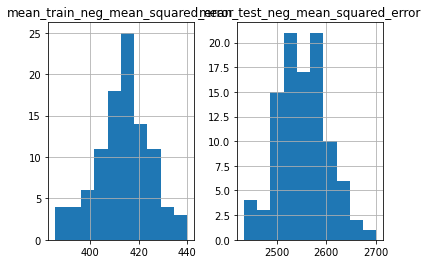

In [52]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('ccp_alpha').mean().hist()

In [53]:
from data import train_train